In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

<Figure size 800x600 with 0 Axes>

In [2]:
df=pd.read_csv("data-1.csv")

df.dropna(axis=1,inplace=True)
df.drop(columns=['id'],inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.diagnosis=[1 if i=='M' else 0 for i in df.diagnosis]

x=df.drop(columns="diagnosis")
y=df["diagnosis"]

x=(x-np.min(x))/(np.max(x)-np.min(x))

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [5]:
neighbor=np.arange(1,10)#1to9
train_acc=np.empty(len(neighbor))
test_acc=np.empty(len(neighbor))


for i,k in enumerate(neighbor):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train,y_train)
    train_acc[i]=knn_model.score(x_train,y_train)
    test_acc[i]=knn_model.score(x_test,y_test)

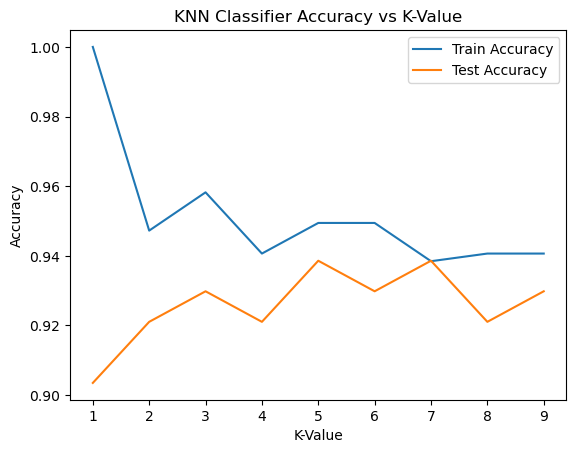

In [6]:
plt.plot(neighbor, train_acc, label="Train Accuracy")
plt.plot(neighbor, test_acc, label="Test Accuracy")
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy vs K-Value')
plt.legend()
plt.show()